In [ ]:
import sys, numpy, sklearn, matplotlib
print(sklearn.__version__)

1.6.1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
X_blob, y_blob_true = make_blobs(n_samples=500, centers =4, cluster_std=[1.2, 1.0, 0.8, 1.1], random_state = 42)

In [ ]:
X_moon, y_moon_true = make_moons(n_samples=500, noise=0.08, random_state = 42)

In [ ]:
scalare = StandardScaler()
X_blob_s = scalare.fit_transform(X_blob)
X_moon_s = scalare.fit_transform(X_moon)

In [ ]:
pca = PCA(n_components=2, random_state=42)
B2 = pca.fit_transform(X_blob_s)
M2 = pca.fit_transform(X_moon_s)

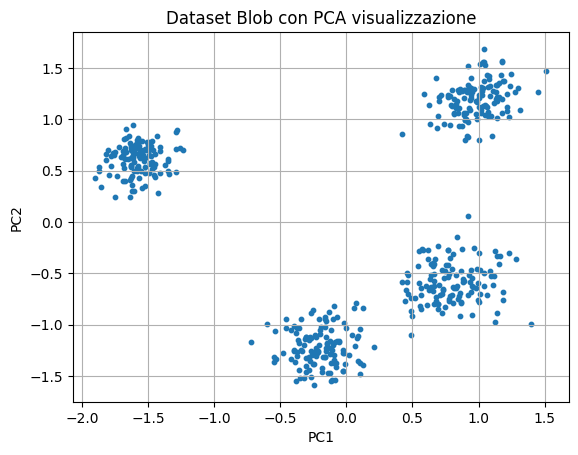

In [ ]:
plt.figure()
plt.scatter(B2[:,0], B2[:,1], s=10)
plt.title("Dataset Blob con PCA visualizzazione")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.grid(True)
plt.show()


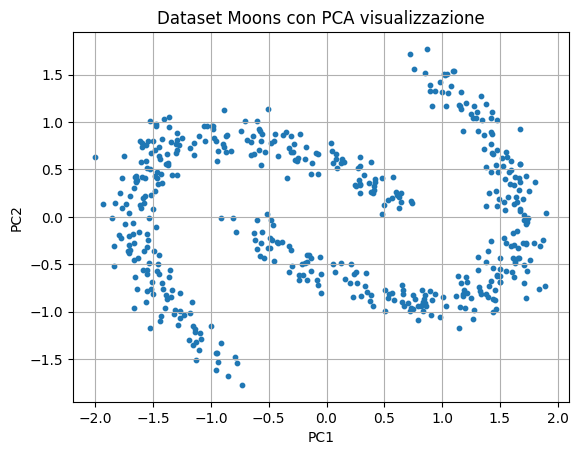

In [ ]:
plt.figure()
plt.scatter(M2[:,0], M2[:,1], s=10)
plt.title("Dataset Moons con PCA visualizzazione")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.grid(True)
plt.show()

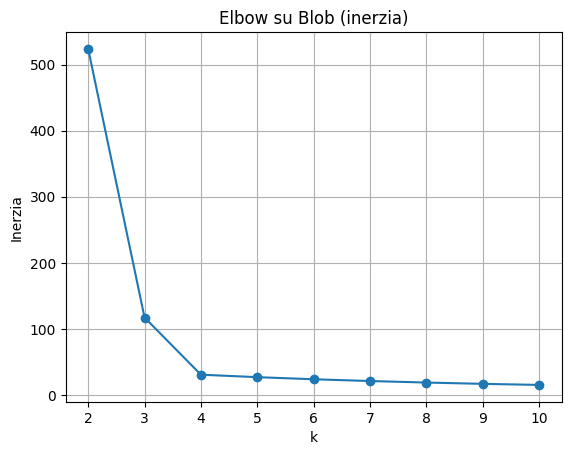

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Per ogni punto i:
# s(i) = b(i) - a(i) / max {a(i), b(i)}
# b(i) = min distanza tra i che è il punto considerato e i punti di C => separazione tra cluster
# a(i) = distanza media tra i, ovvero il punto considerato e gli altri punti dello stesso cluster

def elbow_silhouette(X, kmin=2, kmax=10):
  inerzia, sils = [], []
  ks = range(kmin, kmax+1)
  for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    lab = kmeans.fit_predict(X)
    inerzia.append(kmeans.inertia_)
    sils.append(silhouette_score(X, lab))
  return ks, inerzia, sils

ks, inerzia, sils = elbow_silhouette(X_blob_s, 2, 10)

plt.figure()
plt.plot(list(ks), inerzia, marker='o')
plt.title("Elbow su Blob (inerzia)")
plt.xlabel("k"); plt.ylabel("Inerzia")
plt.grid(True); plt.show()






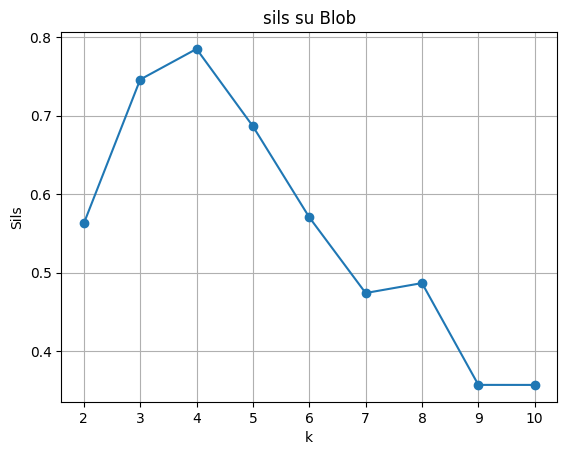

In [28]:
plt.figure()
plt.plot(list(ks), sils, marker='o')
plt.title("sils su Blob")
plt.xlabel("k"); plt.ylabel("Sils")
plt.grid(True); plt.show()

In [29]:
best_k = int(ks[int(np.argmax(sils))])
km = KMeans(n_clusters=best_k, n_init=10, random_state=42)
labels_km = km.fit_predict(X_blob_s)



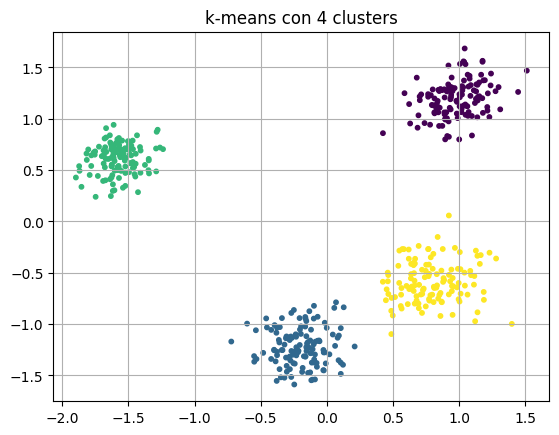

In [31]:
plt.figure()
plt.scatter(B2[:,0], B2[:,1], c=labels_km, s=10)
plt.title(f"k-means con {best_k} clusters")
plt.grid(True)
plt.show()